In [1]:
from gdsCAD import *
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

Beginning file saving
Writing the following cells
TOP_f9keFcPQ: Cell ("TOP_f9keFcPQ", 306 elements, 0 labels)
Finished with file saving


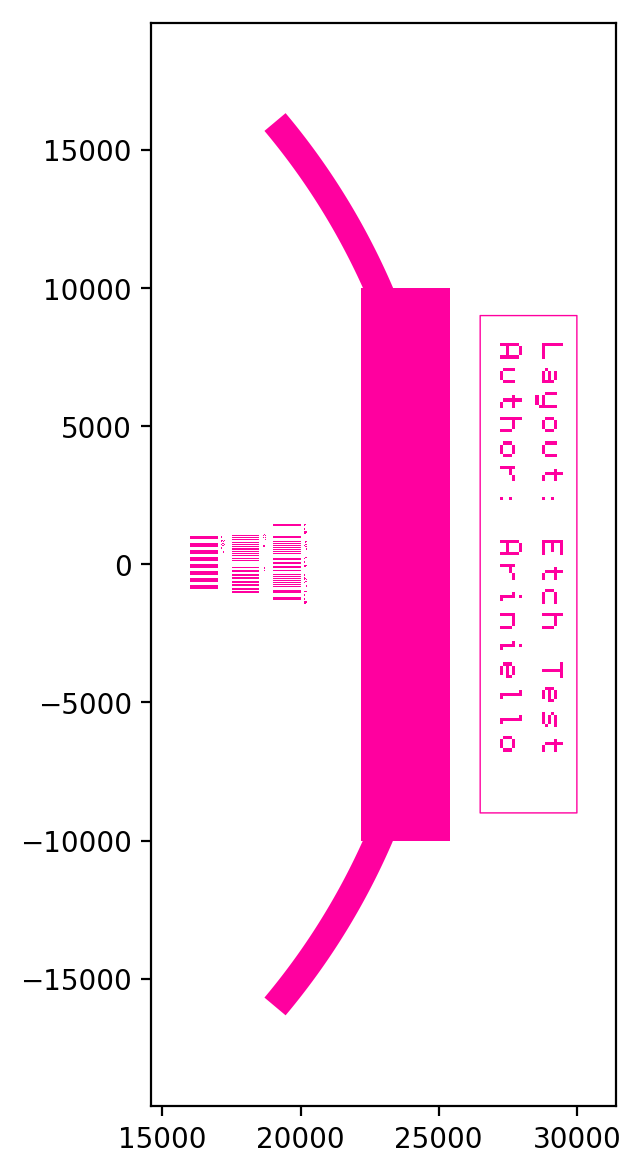

<Figure size 432x288 with 0 Axes>

In [46]:
name = 'Etch Test'
author = 'Ariniello'
top = core.Cell("TOP")

# Add in etch test marks
# Row 1
width = 512
height = 1000
base_x = 20000
base_y = width/2
delta = 600
stripe = [2, 4, 8, 12, 16]
N = len(stripe)
base_y = base_y + delta*int(N/2)
for i in range(N):
    top.add(shapes.Label("%0.0dum" % stripe[i], 150, position=(base_x+100, base_y), layer=10, angle=-90))
    for j in range(int(width/stripe[i]/2)):
        top.add(shapes.Rectangle((base_x, base_y-2*stripe[i]*j), 
                                 (base_x-height, base_y-2*stripe[i]*j-stripe[i]), layer=10))
    base_y -= delta
# Row 2
width = 1024
height = 1000
base_x = 18500
base_y = width/2
delta = 1200
stripe = [32, 64]
N = len(stripe)
base_y = base_y + delta*int(N/2) - delta/2
for i in range(N):
    top.add(shapes.Label("%0.0dum" % stripe[i], 150, position=(base_x+100, base_y), layer=10, angle=-90))
    for j in range(int(width/stripe[i]/2)):
        top.add(shapes.Rectangle((base_x, base_y-2*stripe[i]*j), 
                                 (base_x-height, base_y-2*stripe[i]*j-stripe[i]), layer=10))
    base_y -= delta

# Row 3
width = 2048
height = 1000
base_x = 17000
base_y = width/2
delta = 0
stripe = [128]
N = len(stripe)
base_y = base_y + delta*int(N/2)
for i in range(N):
    top.add(shapes.Label("%0.0dum" % stripe[i], 150, position=(base_x+100, base_y), layer=10, angle=-90))
    for j in range(int(width/stripe[i]/2)):
        top.add(shapes.Rectangle((base_x, base_y-2*stripe[i]*j), 
                                 (base_x-height, base_y-2*stripe[i]*j-stripe[i]), layer=10))
    base_y -= delta

# Add the wafer size
top.add(shapes.Disk((0, 0), 25400, inner_radius=24400, layer=10, number_of_points=500, initial_angle=-40,
                    final_angle=40))
height = 20000
width = 3200
d = 25400-width/2
top.add(shapes.Rectangle((d+width/2, height/2), (d-width/2, -height/2,), layer=10))

# Add a title block with layer info
height = 3500
width = 18000
base = width/2
base_x = 30000
# Top label
top.add(shapes.Box((base_x, base), (base_x-height, base-width), 50, layer=10))
top.add(shapes.Label("Layout: "+name, 1000, position=(base_x-1500, base-1000), layer=10, angle=-90))
top.add(shapes.Label("Author: "+author, 1000, position=(base_x-3000, base-1000), layer=10, angle=-90))

# Add the top-cell to a layout and save
layout = core.Layout("LAYOUT")
layout.add(top)
print("Beginning file saving")
layout.save("Etch.gds")
print("Finished with file saving")
plt.figure(figsize=(3, 8), dpi=200)
layout.show()